Importing the Dependencies

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [68]:
df = pd.read_csv('diabetes.csv')

In [70]:
pd.read_csv?

In [69]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [72]:
df.shape

(768, 9)

In [73]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [74]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [77]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [78]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [79]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [80]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


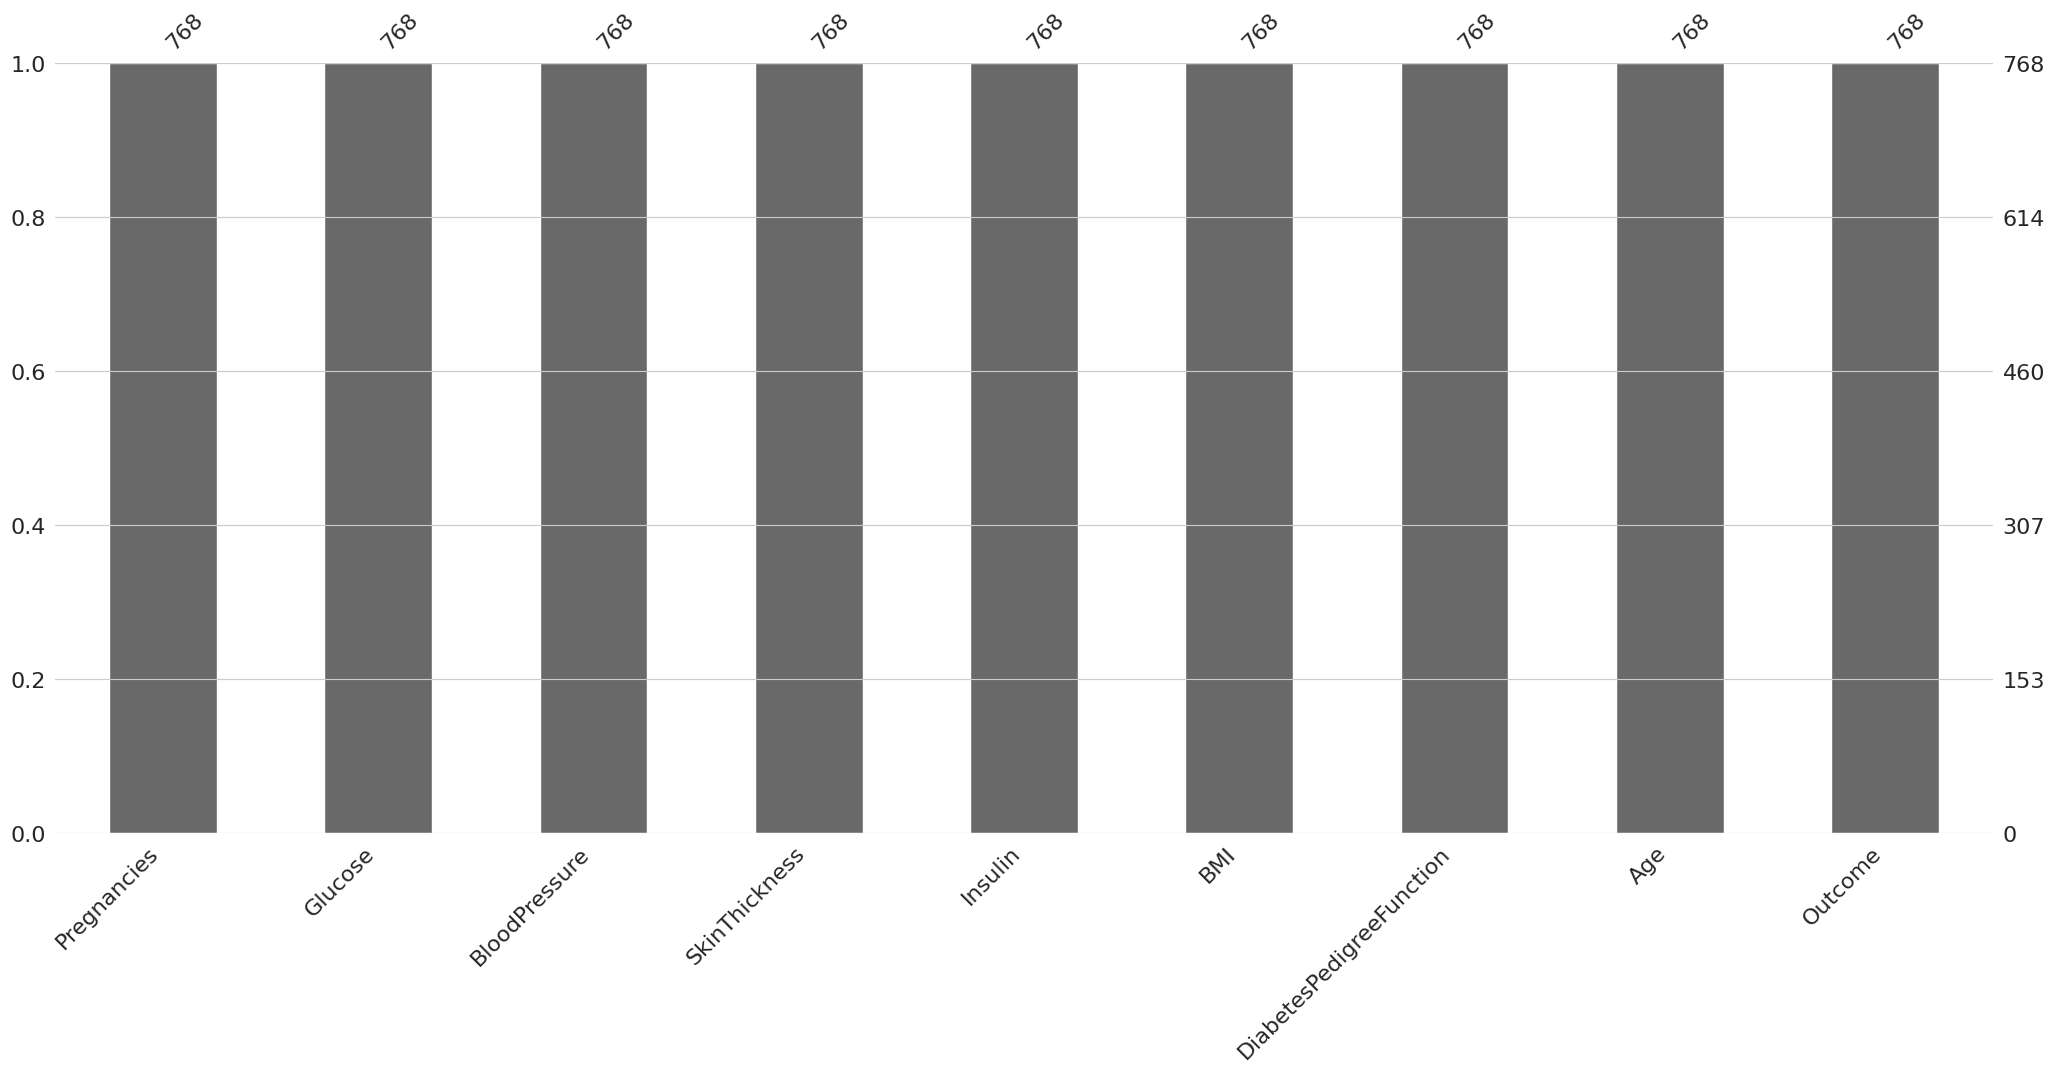

In [81]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)
plt.show()

<Axes: >

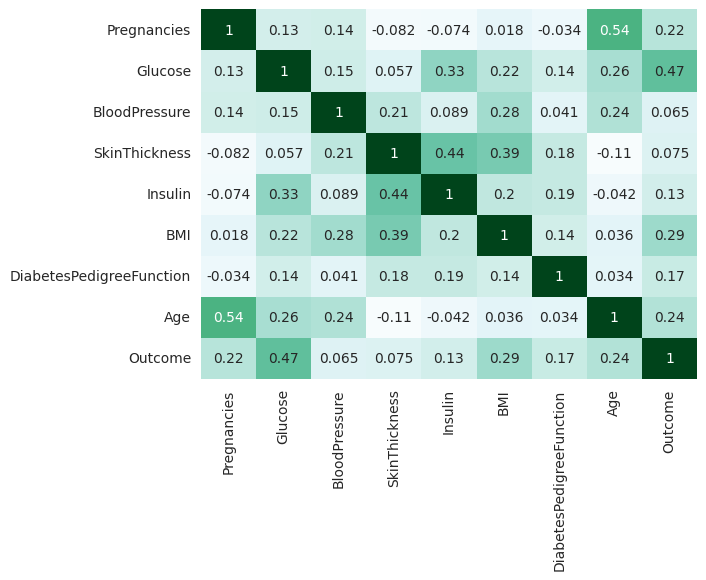

In [82]:
sns.heatmap(df.corr(),cbar=False,cmap='BuGn',annot=True)

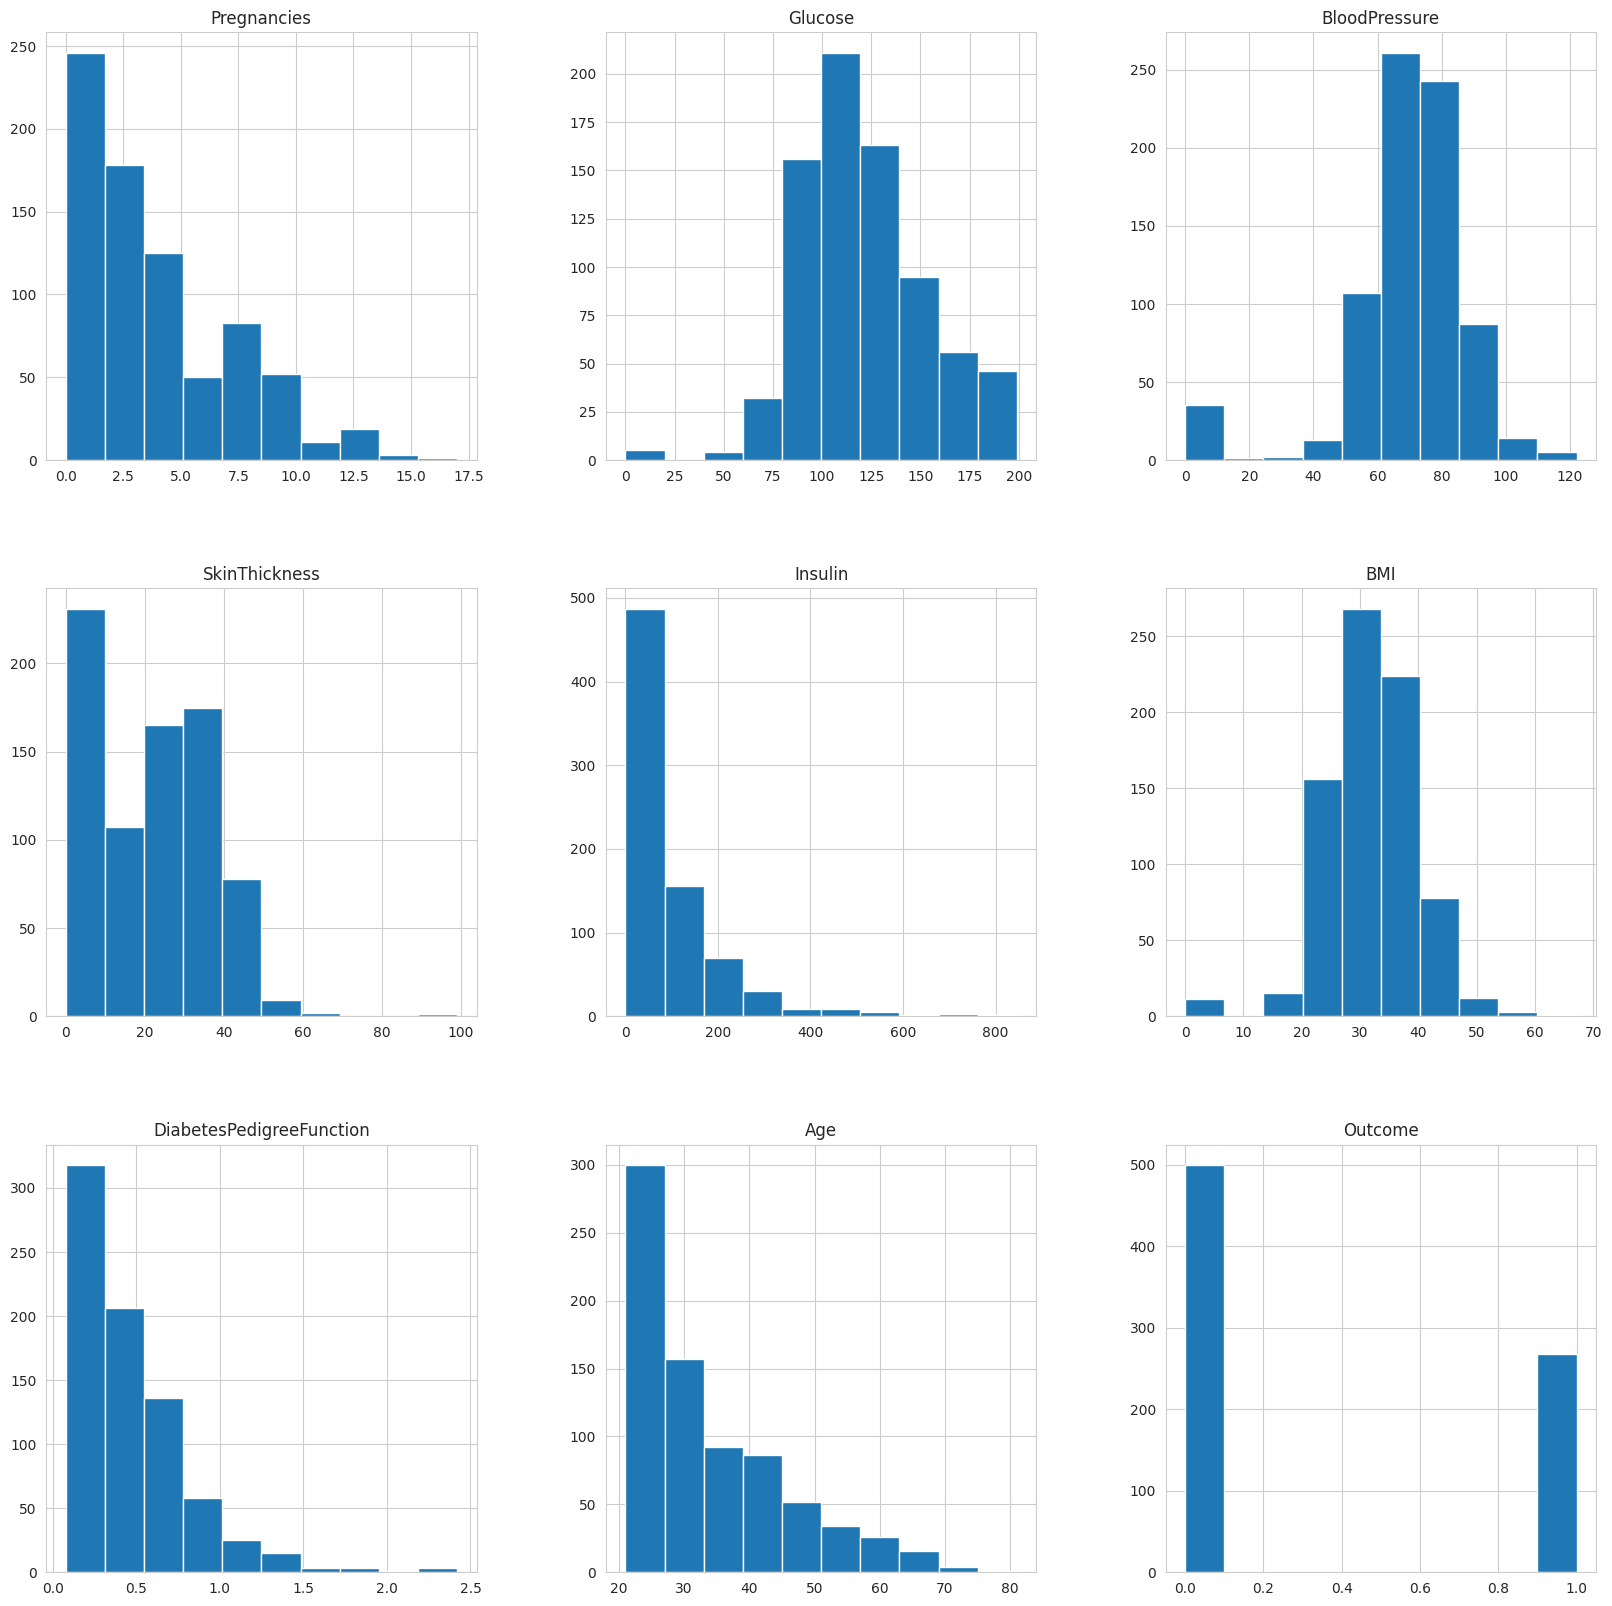

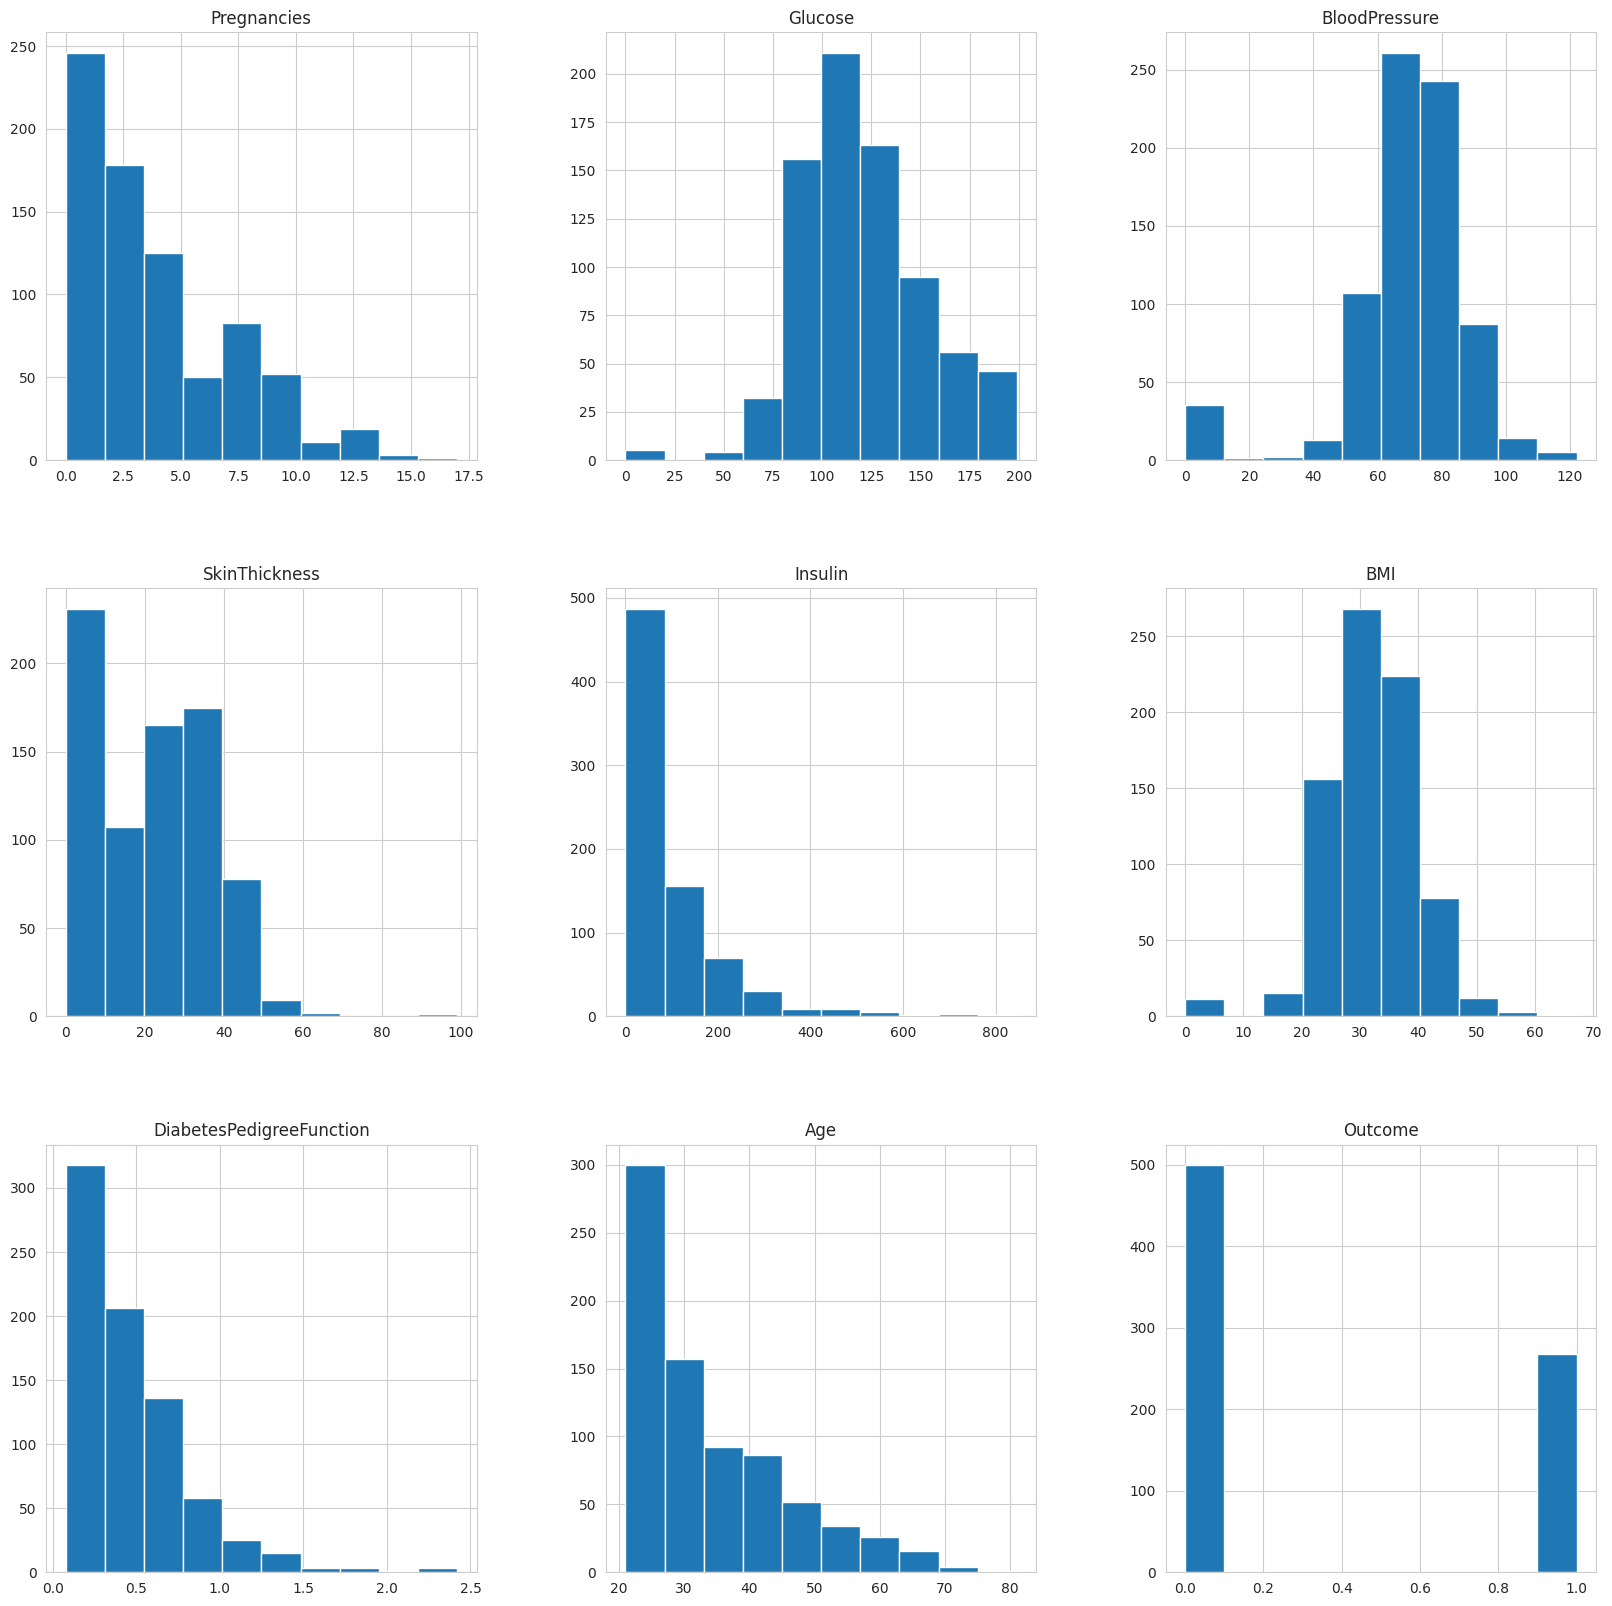

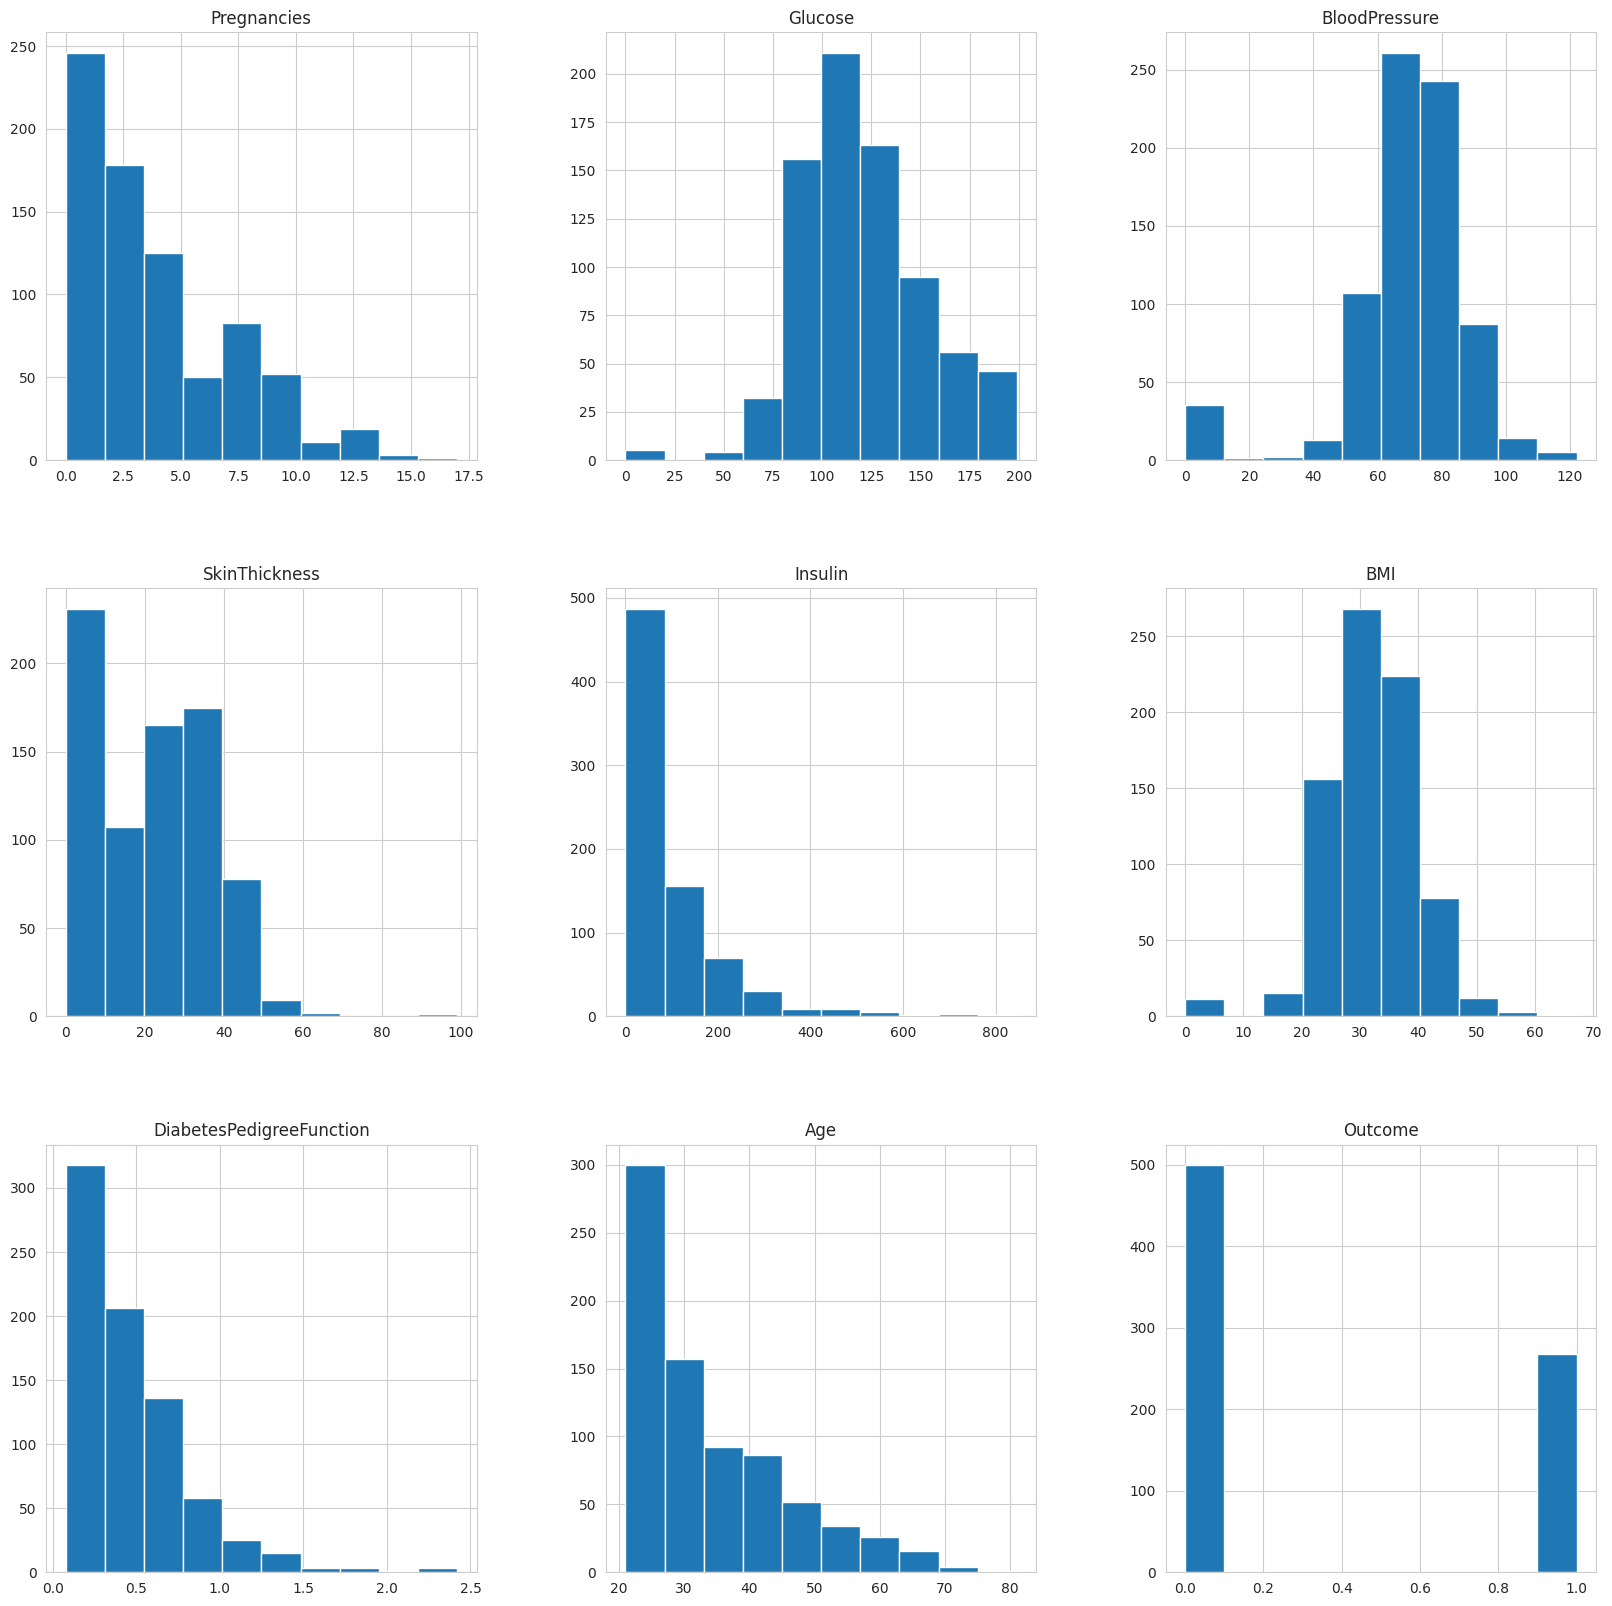

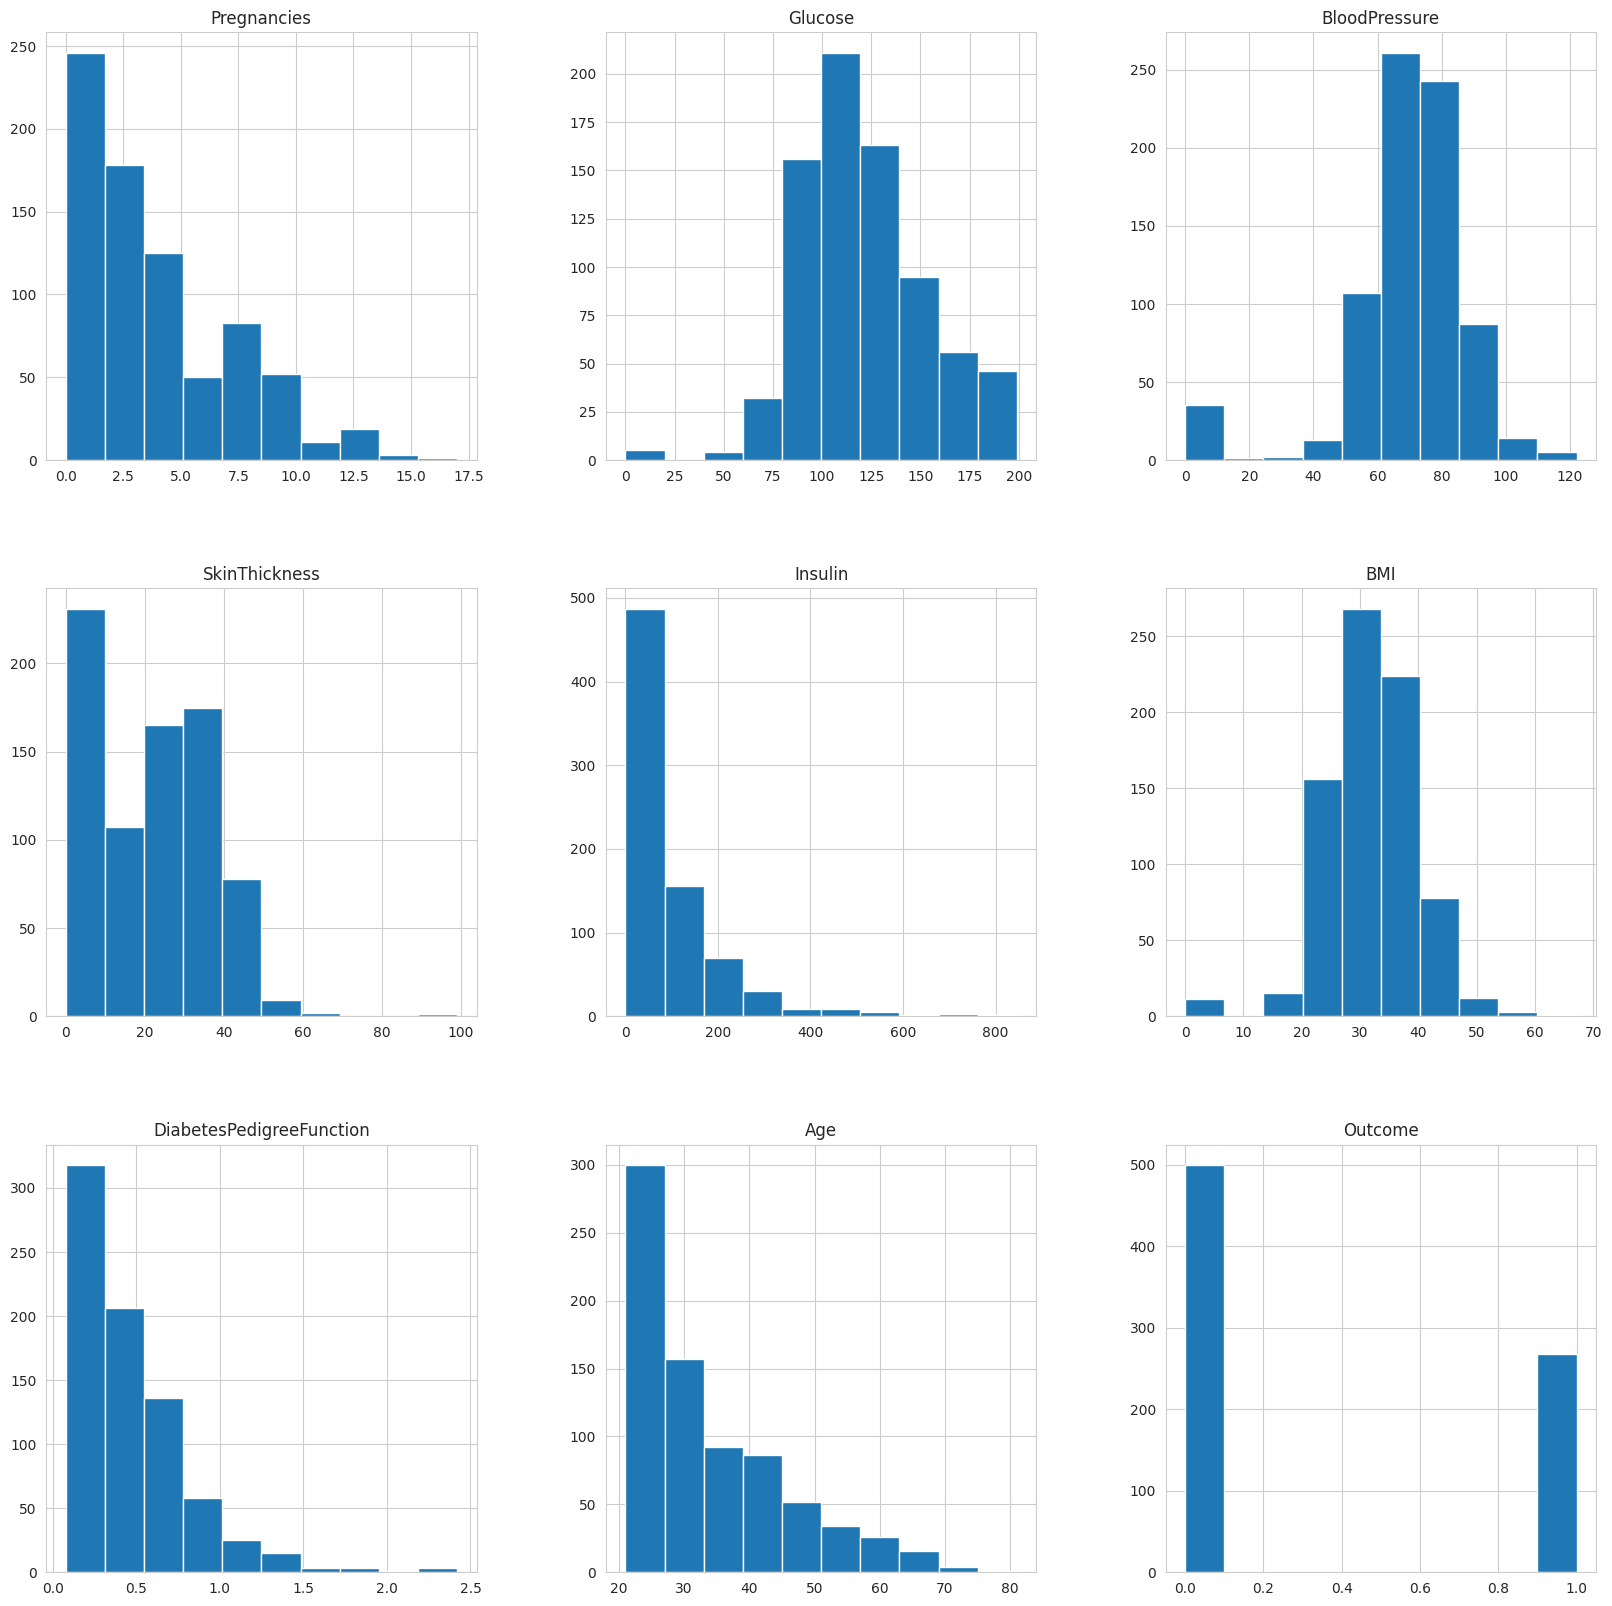

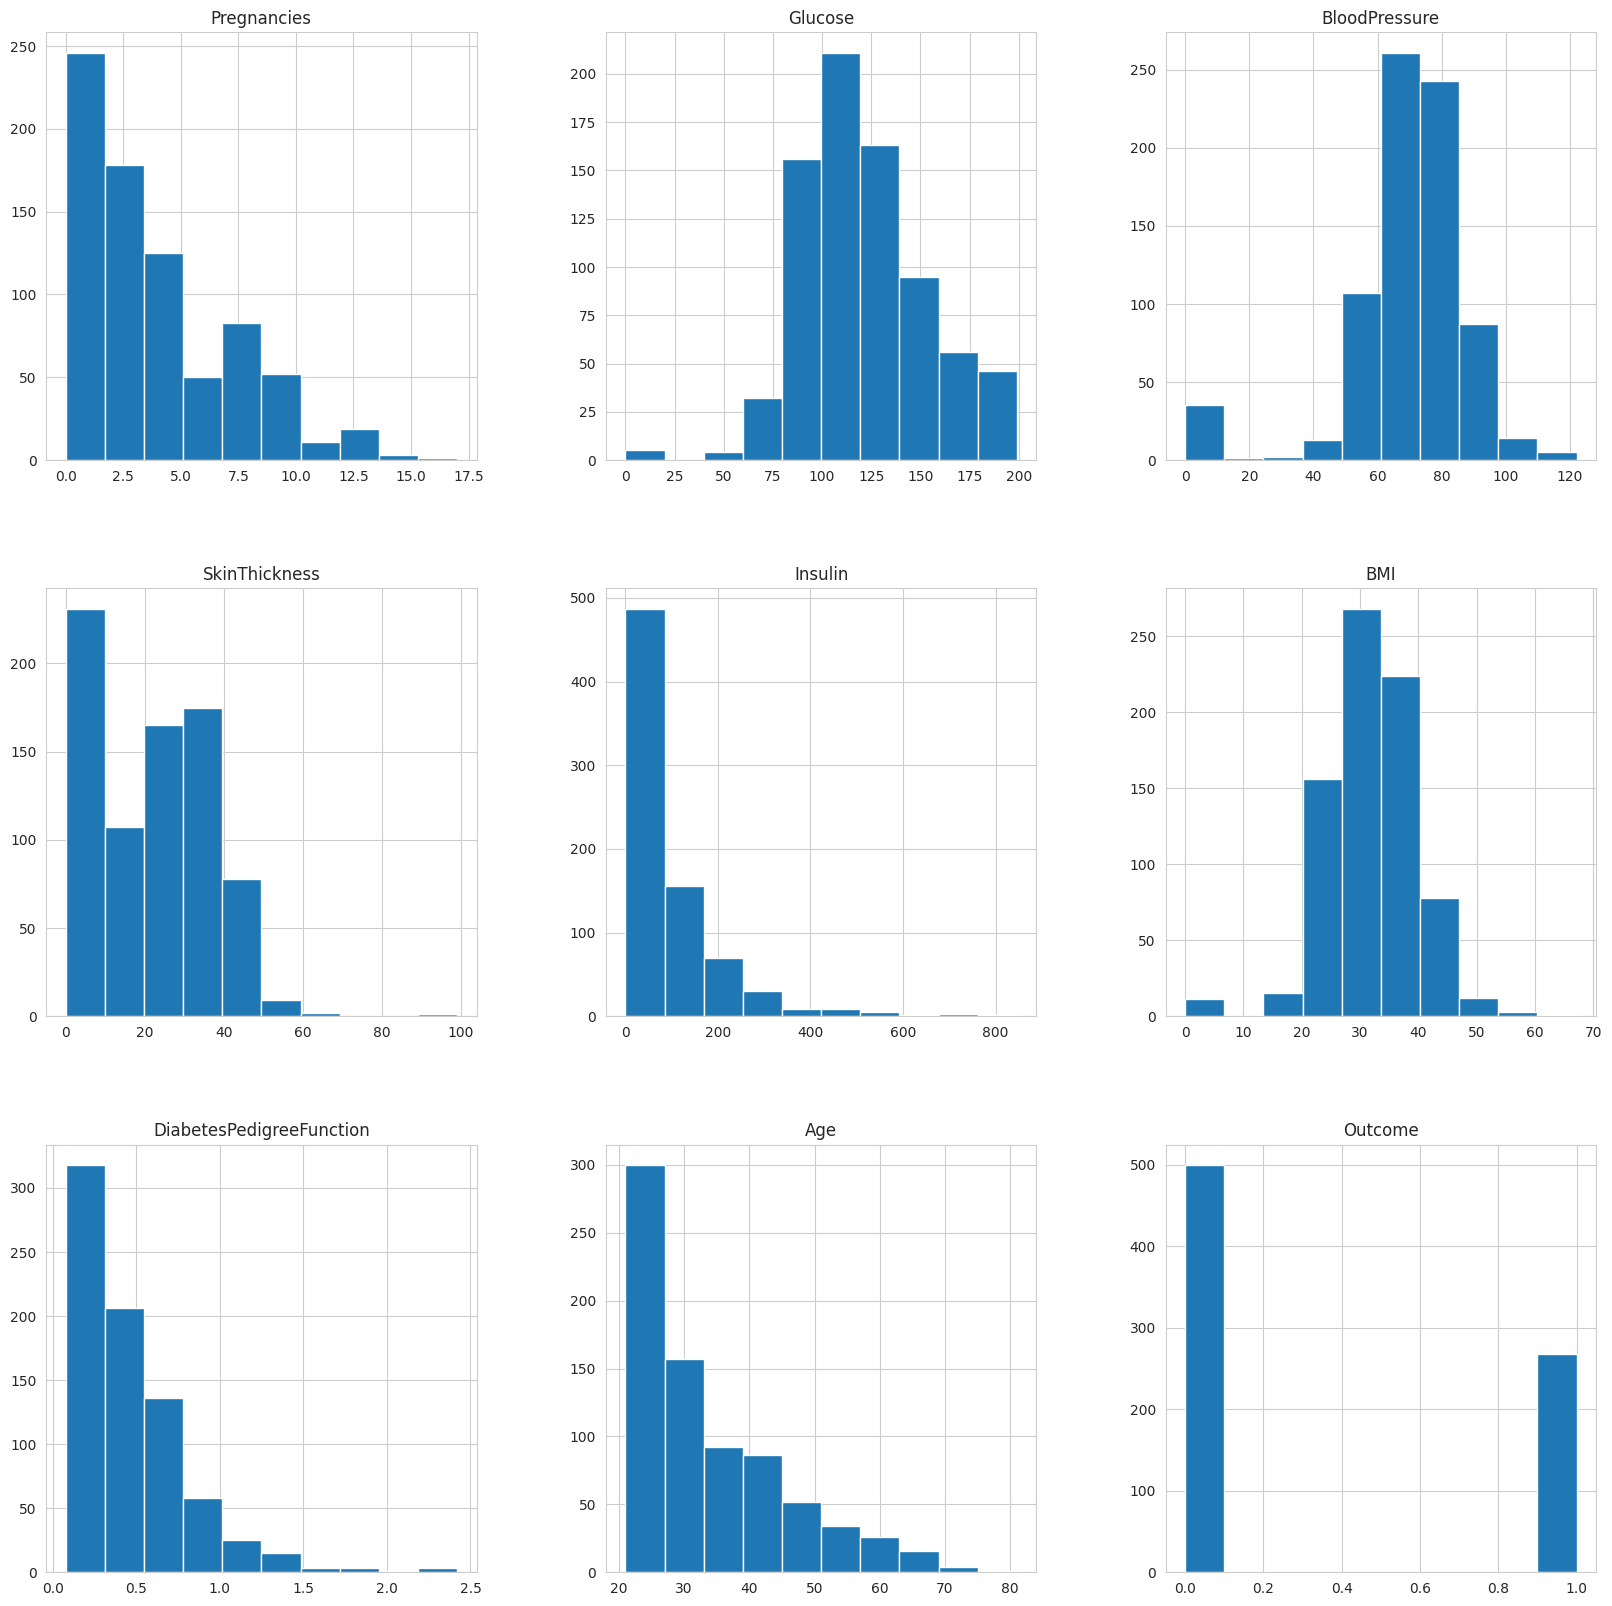

In [83]:
col=['Glucose' ,'BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI']
for i in col:
  #df[i].replace(0,df[i].mean(),inplace=True)
  p=df.hist(figsize = (20,20))

<Axes: xlabel='Outcome', ylabel='Age'>

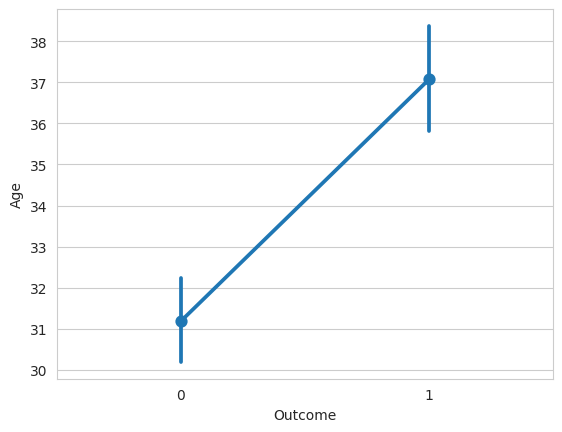

In [84]:
sns.pointplot(x='Outcome', y= 'Age', data=df)

<Axes: xlabel='Age', ylabel='Insulin'>

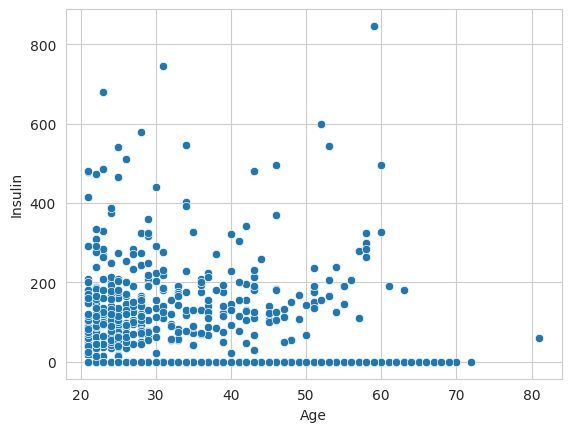

In [85]:
sns.scatterplot(x='Age',y='Insulin',data=df)

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

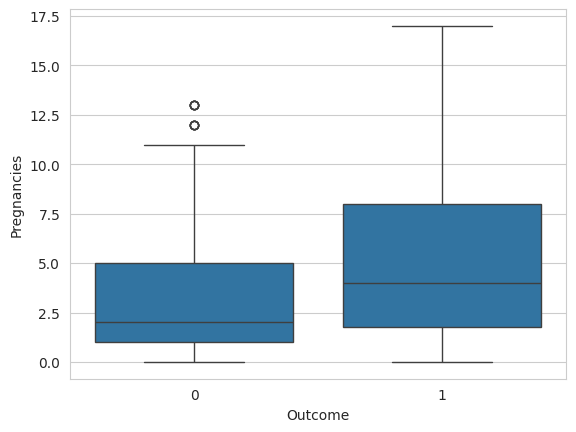

In [86]:
sns.boxplot(x='Outcome',y='Pregnancies',data=df)

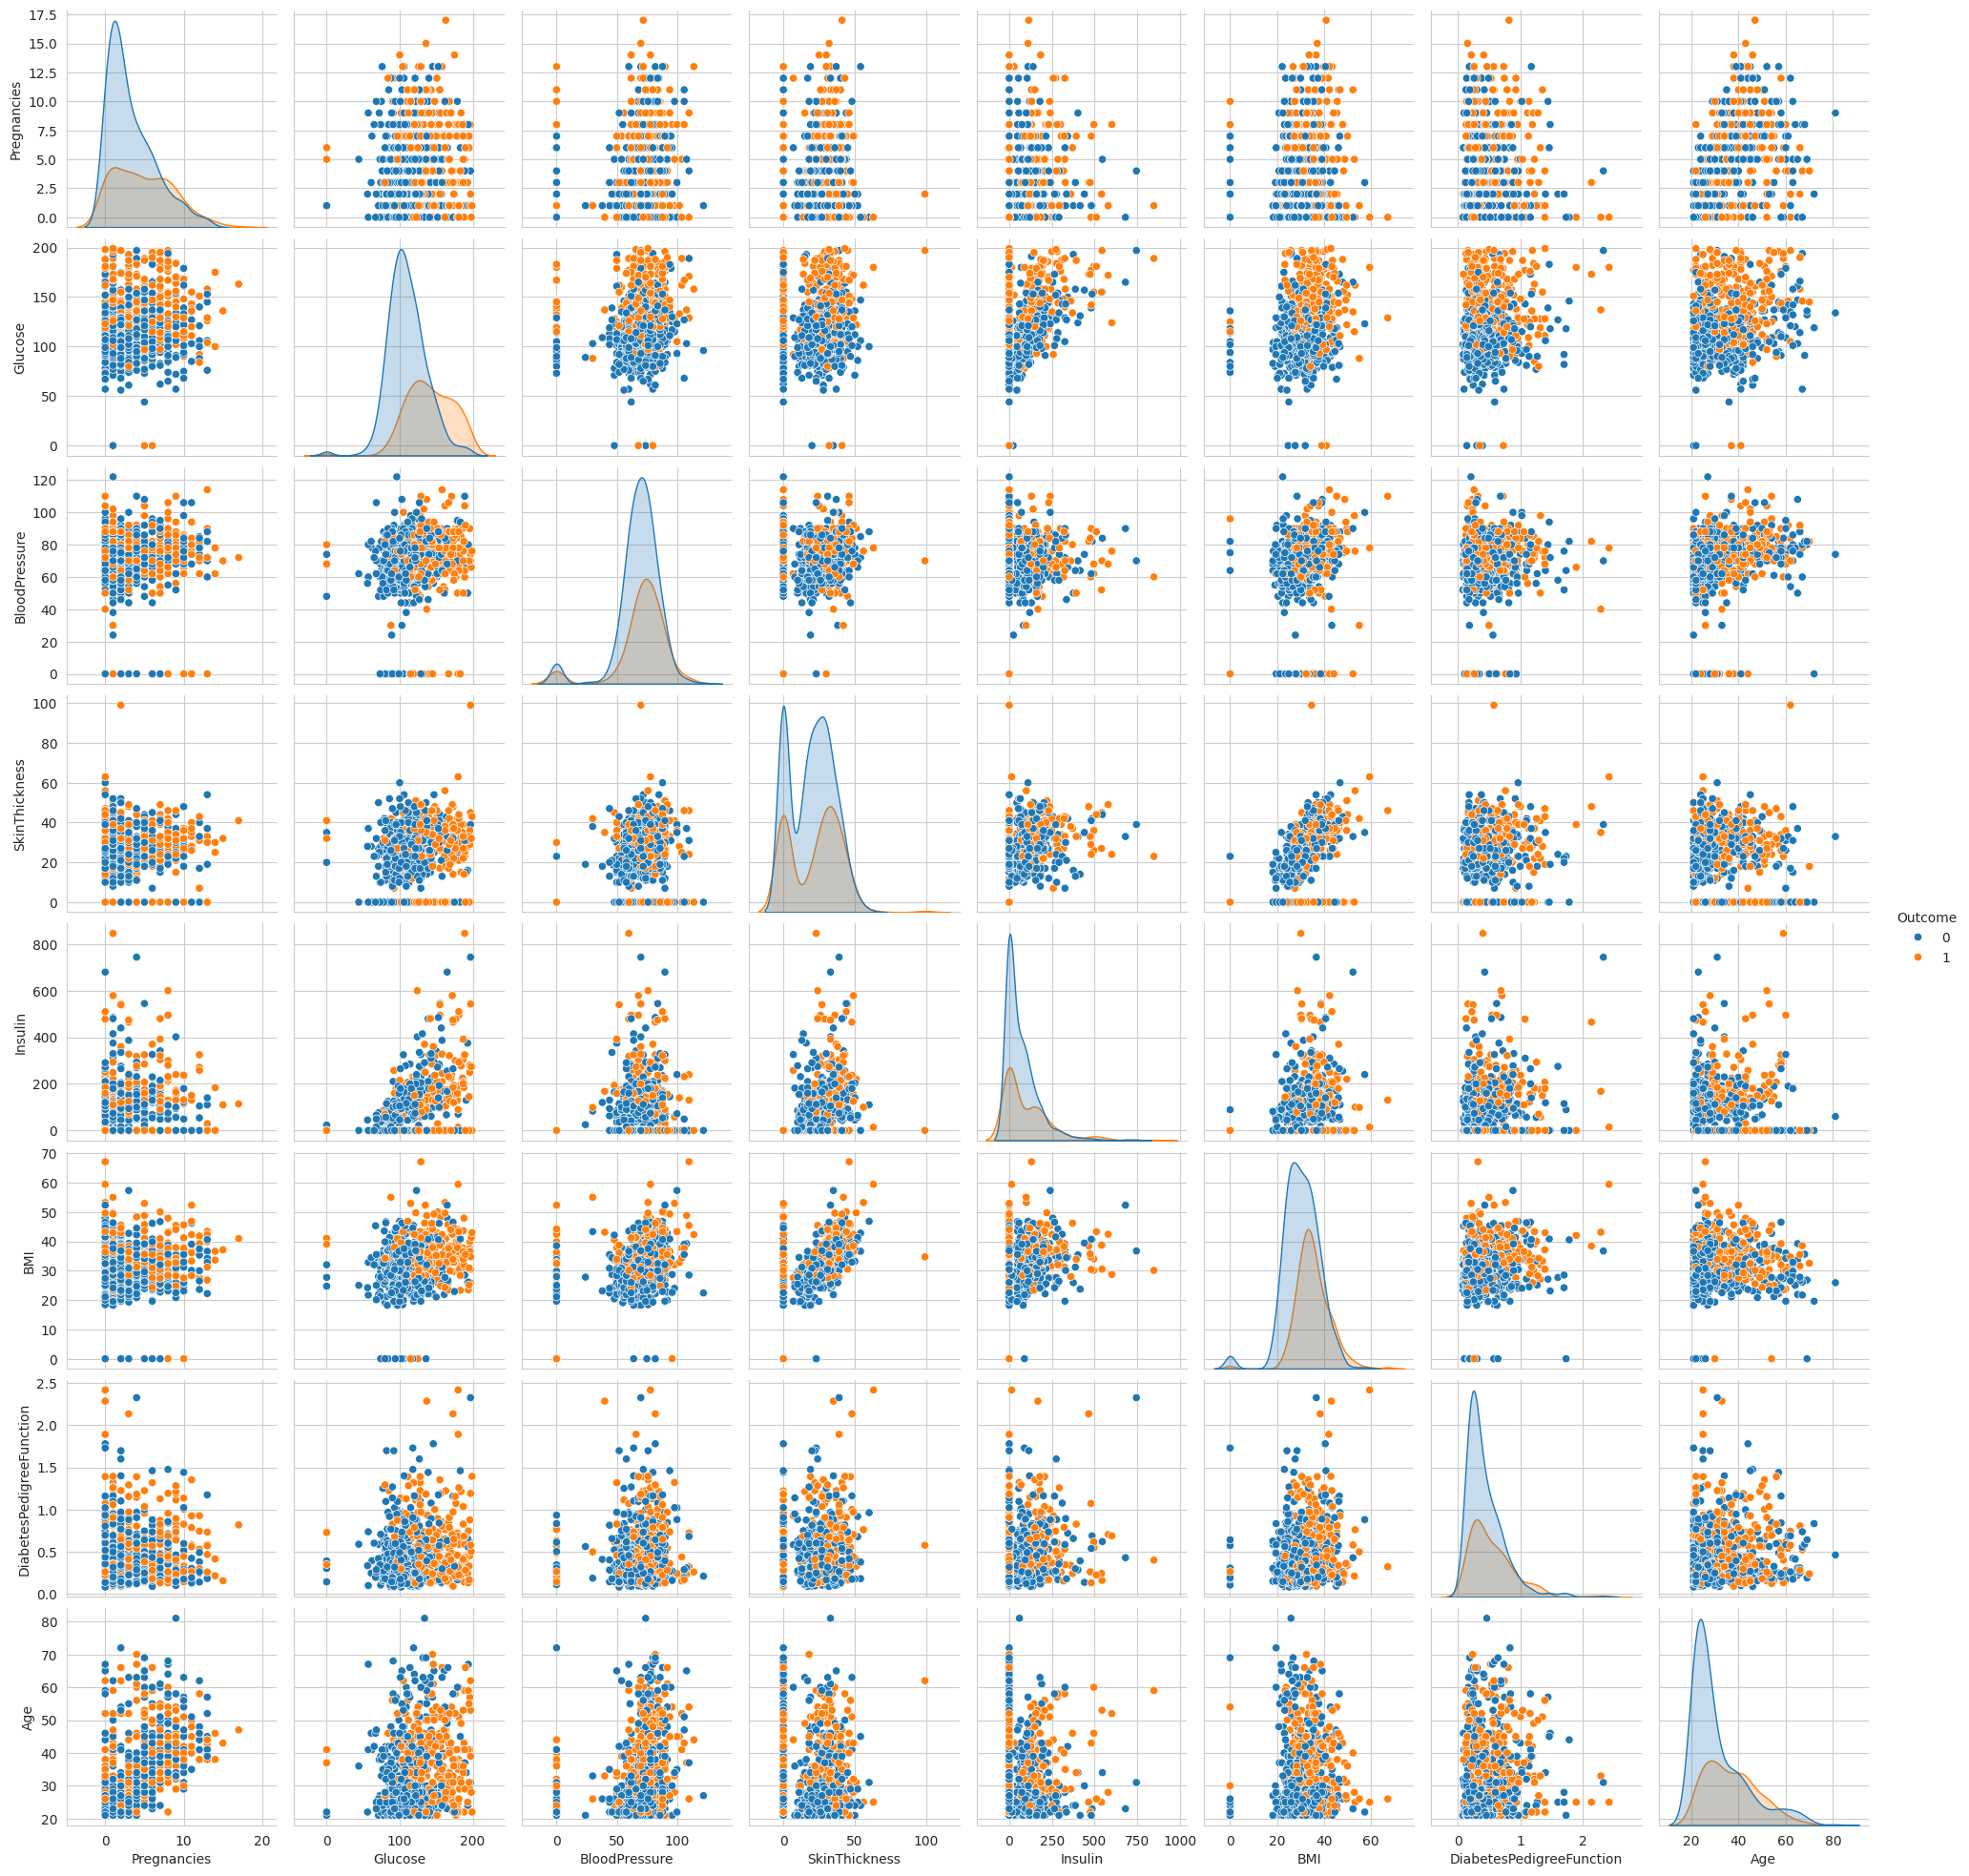

In [87]:
sns.pairplot(df,hue='Outcome')

<Axes: xlabel='Pregnancies', ylabel='Age'>

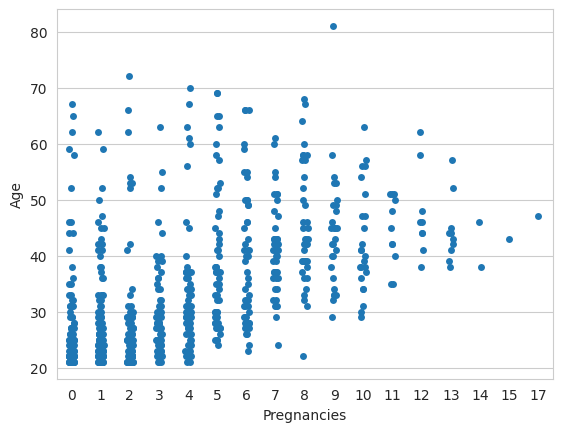

In [88]:
sns.stripplot(x='Pregnancies',y='Age',data=df)

<Axes: xlabel='SkinThickness', ylabel='Insulin'>

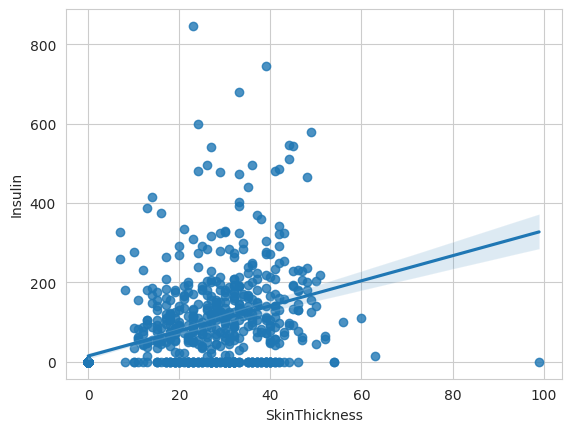

In [89]:
sns.regplot(x='SkinThickness', y= 'Insulin', data=df)

In [90]:
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

Data Standardization

In [91]:
scaler = StandardScaler()

In [92]:
scaler.fit(X)

StandardScaler()

In [93]:
standardized_data = scaler.transform(X)

In [94]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [95]:
X = standardized_data
Y = df['Outcome']

In [96]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [99]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [98]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:78.50162866449512
Test Set Accuracy:75.97402597402598


In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:79.80456026058633
Test Set Accuracy:72.72727272727273


In [101]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,Y_train)

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:82.89902280130293
Test Set Accuracy:72.72727272727273


In [102]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:80.94462540716613
Test Set Accuracy:73.37662337662337


In [103]:
from sklearn.model_selection import train_test_split                #splitting the dataset

train,val_train,test,val_test = train_test_split(X,Y,test_size=.50,random_state=3)

Model Evaluation

In [104]:
X_train,X_test,Y_train,Y_test = train_test_split(train,test,test_size=.20,random_state=3)

In [105]:
#first model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [106]:
# second model
svm = SVC()
svm.fit(X_train, Y_train)

SVC()

In [107]:
pred_1=knn.predict(val_train)
pred_2=svm.predict(val_train)

# addition of 2 predictions
result = np.column_stack((pred_1,pred_2))

In [108]:
pred_test1=knn.predict(X_test)
pred_test2=svm.predict(X_test)


predict_test=np.column_stack((pred_test1,pred_test2))

In [109]:
# stacking classifier
#RandomForestClasifier:- In this prediction of other 2 classification is taken as x value
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(result,val_test)

RandomForestClassifier()

In [110]:
rand_clf.score(result,val_test)

0.7317708333333334

Accuracy Score

In [111]:
rand_acc=accuracy_score(Y_test ,rand_clf.predict(predict_test))

In [112]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Stacking'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, rand_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Stacking,0.818182
0,Logistic,0.759740
3,Decision Tree Classifier,0.733766
1,KNN,0.727273
2,SVC,0.727273


<ipython-input-113-51a98cb71ffa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
<ipython-input-113-51a98cb71ffa>:7: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=models['Model'],y=models['Score'], palette=colors )


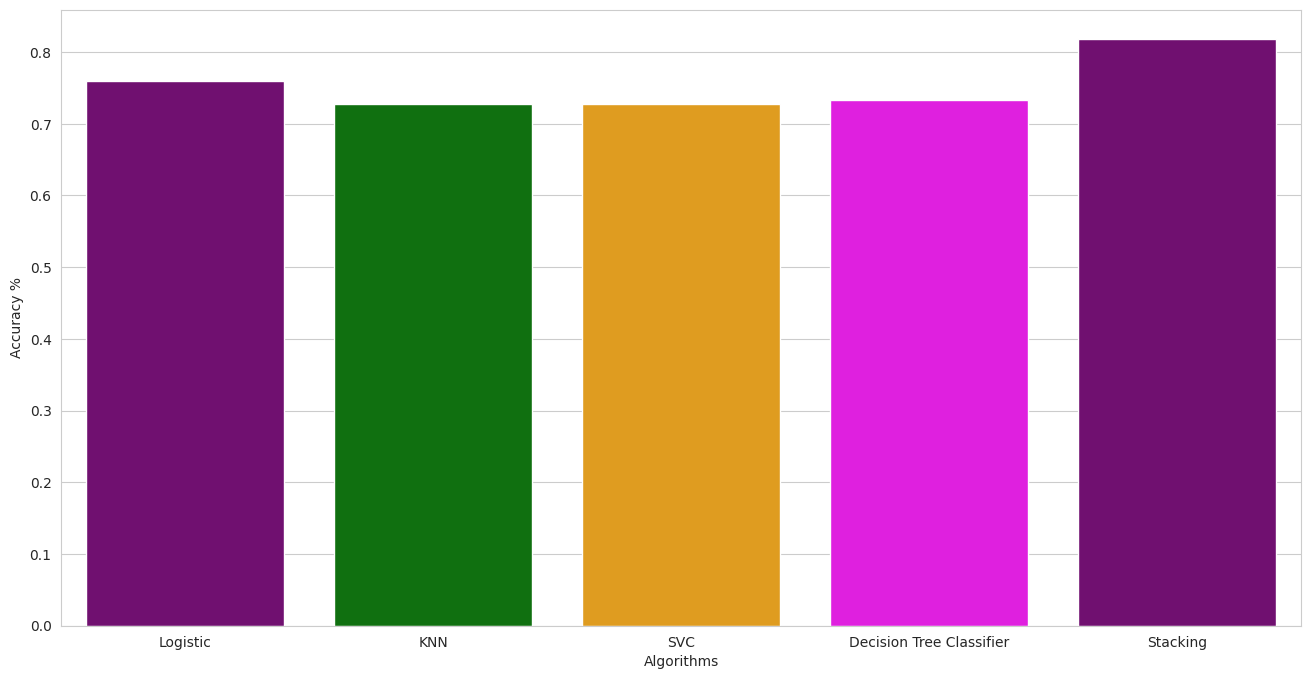

In [113]:
colors = ["purple", "green", "orange", "magenta"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

<ipython-input-66-6dd1c2a1e077>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models['Model'], y=models['Score'], palette=colors)


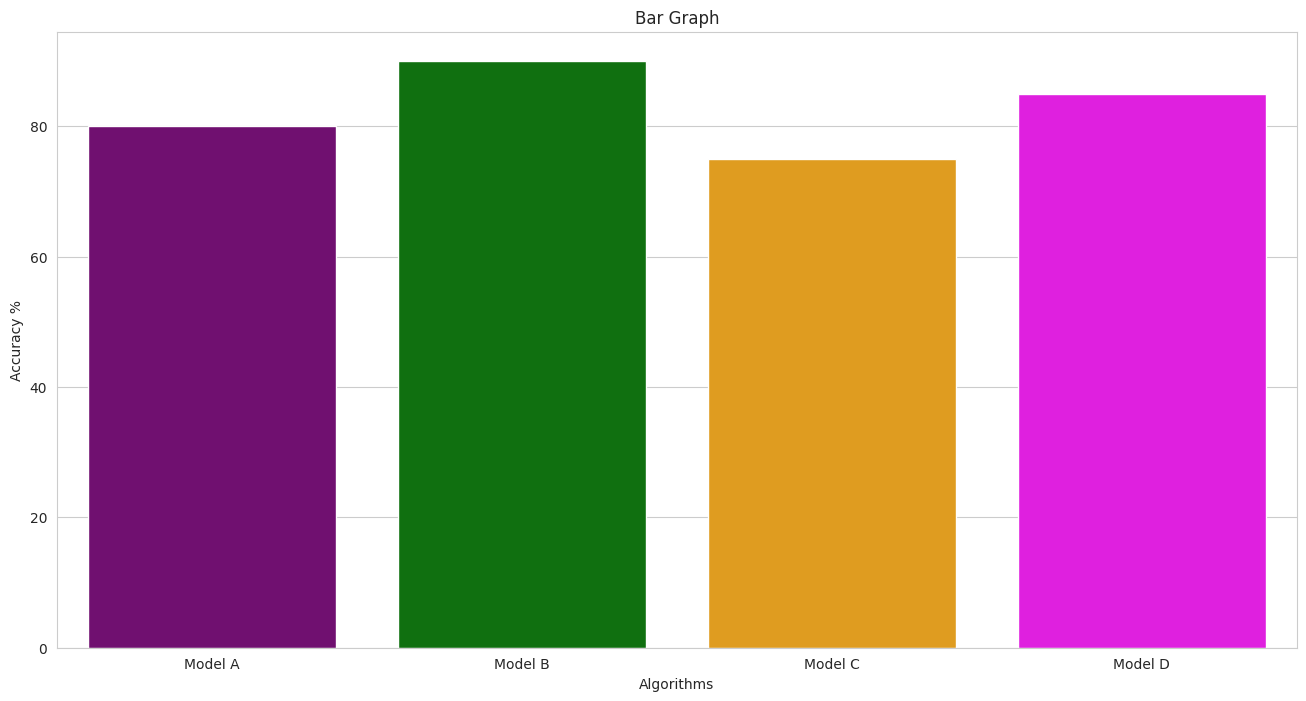

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
models = {'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
          'Score': [80, 90, 75, 85]}

colors = ["purple", "green", "orange", "magenta"]

# Bar graph
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'], y=models['Score'], palette=colors)
plt.title('Bar Graph')
plt.show()






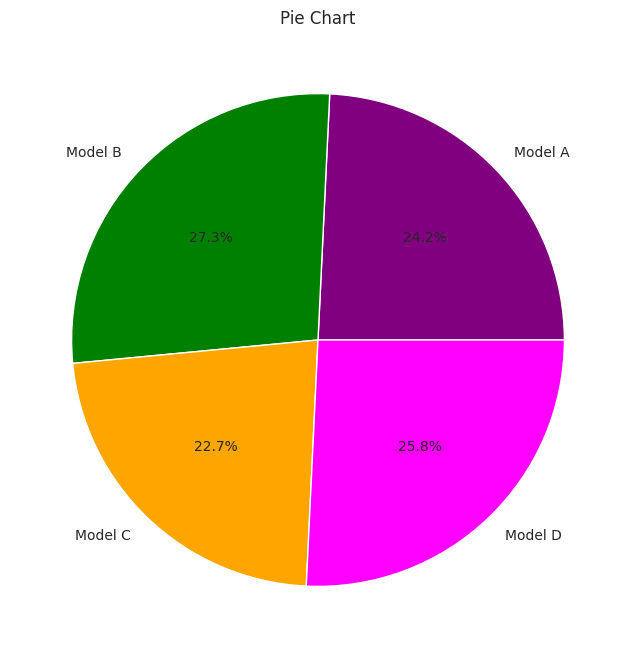

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
models = {'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
          'Score': [80, 90, 75, 85]}

colors = ["purple", "green", "orange", "magenta"]

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(models['Score'], labels=models['Model'], autopct='%1.1f%%', colors=colors)
plt.title('Pie Chart')
plt.show()

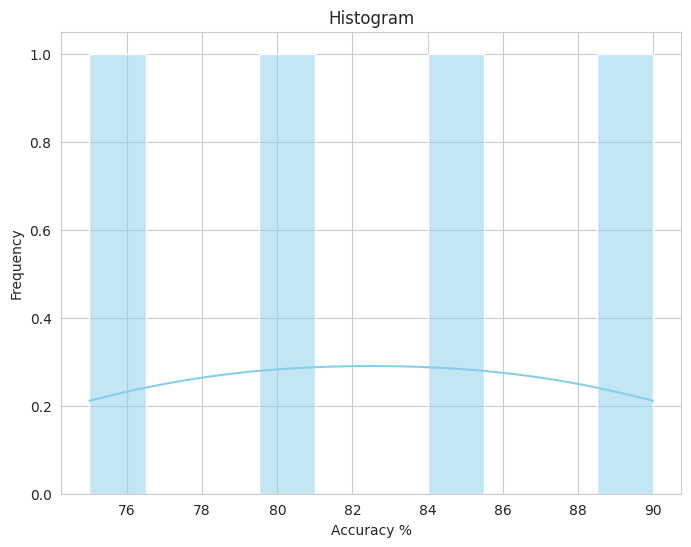

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
models = {'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
          'Score': [80, 90, 75, 85]}

colors = ["purple", "green", "orange", "magenta"]
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(models['Score'], bins=10, kde=True, color='skyblue')
plt.xlabel("Accuracy %")
plt.ylabel("Frequency")
plt.title('Histogram')
plt.show()

Making a Predictive System

In [116]:

from sklearn.ensemble import RandomForestClassifier

# Assuming you have a trained model stored in 'models'
# Create an instance of the model
models = RandomForestClassifier()

# Fit the model before making predictions
models.fit(X_train, Y_train)

# Now you can use the model to make predictions
prediction = models.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[0]
The person is not diabetic
